# Hyperparameter Tuning
hyper parameter tuning is the process of finding the best hyper parameters for a model. In this notebook, I will show you how to use hyperopt to tune the hyper parameters of a model. I will use the hyperopt library to tune the hyper parameters of a random forest model.
types:
- Grid Search: This is the simplest method of hyperparameter tuning. It is a brute force method where we specify a list of values for each hyperparameter and the computer evaluates the model performance for each combination of hyperparameters. The model with the best performance is selected.
- Random Search: This is similar to grid search but instead of evaluating all possible combinations of hyperparameters, we evaluate only a random sample of the possible combinations.
- Bayesian Optimization: This is a more sophisticated method of hyperparameter tuning. It uses a probabilistic model to model the objective function and then uses this model to select the next hyperparameters to evaluate. This method is more efficient than grid search and random search.
- Gradient-based Optimization: This method uses gradient descent to optimize the hyperparameters. It is more efficient than grid search and random search but it requires the objective function to be differentiable.
- Genetic Algorithms: This method uses genetic algorithms to optimize the hyperparameters. It is more efficient than grid search and random search but it requires the objective function to be differentiable.

# Cross Validation
Cross validation is a technique used to evaluate the performance of a model. It is used to estimate the performance of a model on an independent dataset. In this notebook, I will show you how to use cross validation to evaluate the performance of a model. I will use the cross_val_score function from the scikit-learn library to evaluate the performance of a random forest model using cross validation.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [6]:
# Load the data
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [11]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [25]:
# Set up the hyperparameter search
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200, 300, 400],
              "learning_rate": [0.05, 0.1,0.16],
              "subsample": [0.8, 0.9, 1.0],
              "colsample_bytree": [0.8, 0.9, 1.0]}

In [26]:
# set up the grid
grid = GridSearchCV(estimator=model, param_grid=param_dist,
                     cv=5, n_jobs=-1, verbose=1,
                     scoring='accuracy')

In [27]:
# fit the grid with data
grid.fit(X, y)
# print best parameters
print(grid.best_params_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


In [35]:
model = XGBClassifier(**grid.best_params_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9
F1 Score: 0.9000000000000001
Recall: 0.9
Precision: 0.9027272727272726
[[9 0 0]
 [0 9 2]
 [0 1 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.82      0.86        11
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



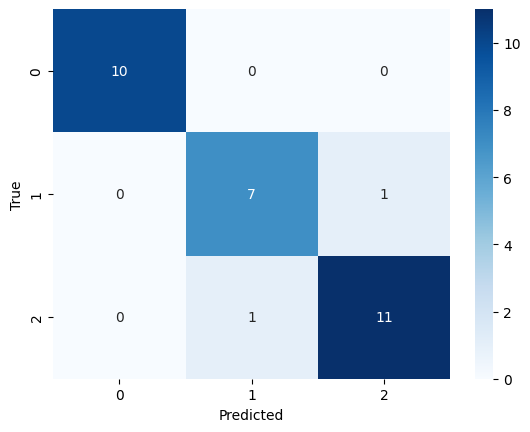

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Random Search 

In [40]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
print(rf_random.best_params_)

c:\Users\ATECH\.conda\envs\python_ml\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1}
